In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# import warnings
# warnings.filterwarnings('ignore')

In [88]:
from dotenv import load_dotenv
load_dotenv('.env')
API_KEY = os.environ.get("X-CMC_PRO_API_KEY")
API_KEY

'0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'

In [89]:
# extract data from coinmarktcap website
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {'Accepts': 'application/json', 'X-CMC_PRO_API_KEY': API_KEY}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [90]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head(2)

c:\Users\jfeng\AppData\Local\Continuum\miniconda3\envs\py39\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9648,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19109012.00000,19109012.00000,NaN,1,NaN,NaN,None,2022-08-01T03:48:00.000Z,23355.11774,23244357532.12243,-15.86530,-0.23792,-1.61217,6.80751,22.19471,-21.51491,-39.37367,446293225145.72931,41.05740,490457472529.72998,None,2022-08-01T03:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-01 03:49:50.652841
1,1027,Ethereum,ETH,ethereum,5869,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121780057.87400,121780057.87400,NaN,2,NaN,NaN,None,2022-08-01T03:47:00.000Z,1687.78216,14297442947.55727,-2.46420,-0.31796,-0.29669,11.50134,62.50737,-7.19456,-40.74031,205538208672.98944,18.90810,205538208672.98999,None,2022-08-01T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-01 03:49:50.652841


In [12]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.Timestamp("today")

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names', index=False)
    else:
        df.to_csv(r'API.csv', mode='a', header=False, index=False)

In [14]:
import os 
from time import time
from time import sleep

for i in range(2):
    api_runner()
    print('API Runner completed')
    sleep(10) #sleep for 1 minute

API Runner completed
API Runner completed


In [18]:
df72 = pd.read_csv(r'API.csv')
df72.head(2)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9648,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.910901e+07,1.910901e+07,NaN,1,NaN,NaN,NaN,2022-08-01T02:58:00.000Z,23428.593151,2.333257e+10,-15.8590,0.062019,-1.550675,6.591248,22.192079,-21.420163,-39.01668,4.476973e+11,41.0804,4.920005e+11,NaN,2022-08-01T02:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 22:58:42.181918
1,1,1027,Ethereum,ETH,ethereum,5869,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.217801e+08,1.217801e+08,NaN,2,NaN,NaN,NaN,2022-08-01T02:57:00.000Z,1693.766878,1.430460e+10,-3.3293,-0.019532,-0.174251,11.171749,62.271168,-7.360626,-40.40830,2.062670e+11,18.9287,2.062670e+11,NaN,2022-08-01T02:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 22:58:42.181918


In [20]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [56]:
# Now let's look at the coin trends over time
vals_to_replace = {
            'quote.USD.percent_change_1h': '1h',
            'quote.USD.percent_change_24h': '24h',
            'quote.USD.percent_change_7d': '7d',
            'quote.USD.percent_change_30d': '30d',
            'quote.USD.percent_change_60d': '60d',
            'quote.USD.percent_change_90d': '90d'
        }

df3 = (df
    .groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
    .stack()
    .to_frame(name='values')
    .reset_index()
    .rename(columns={'values': 'percent_change', 'level_1': 'time_frame'})
    .replace({'time_frame': vals_to_replace})
    )
df3.head()

,name,time_frame,percent_change
0,Bitcoin,1h,0.06202
1,Bitcoin,24h,-1.55067
2,Bitcoin,7d,6.59125
3,Bitcoin,30d,22.19208
4,Bitcoin,60d,-21.42016


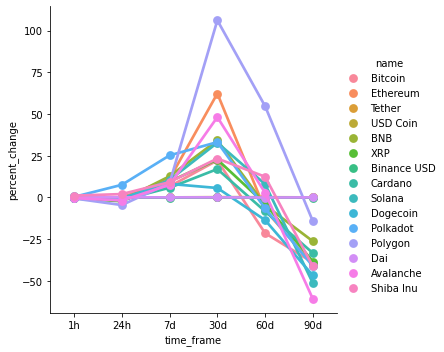

In [68]:
sns.catplot(x='time_frame', y='percent_change', hue='name', data=df3, kind='point');
plt.show()

In [69]:
# we are going to create a dataframe with the columns we want
df4 = df3.query("name == 'Bitcoin'")

,name,time_frame,percent_change
0,Bitcoin,1h,0.06202
1,Bitcoin,24h,-1.55067
2,Bitcoin,7d,6.59125
3,Bitcoin,30d,22.19208
4,Bitcoin,60d,-21.42016
5,Bitcoin,90d,-39.01668


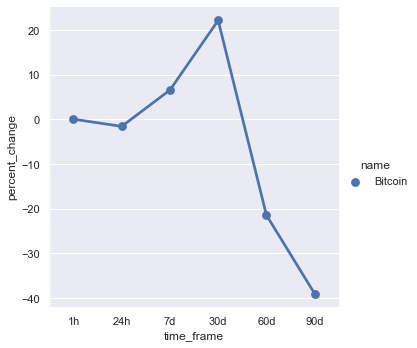

In [73]:
sns.set_theme(style="darkgrid")
sns.catplot(x='time_frame', y='percent_change', hue='name', data=df4, kind='point')

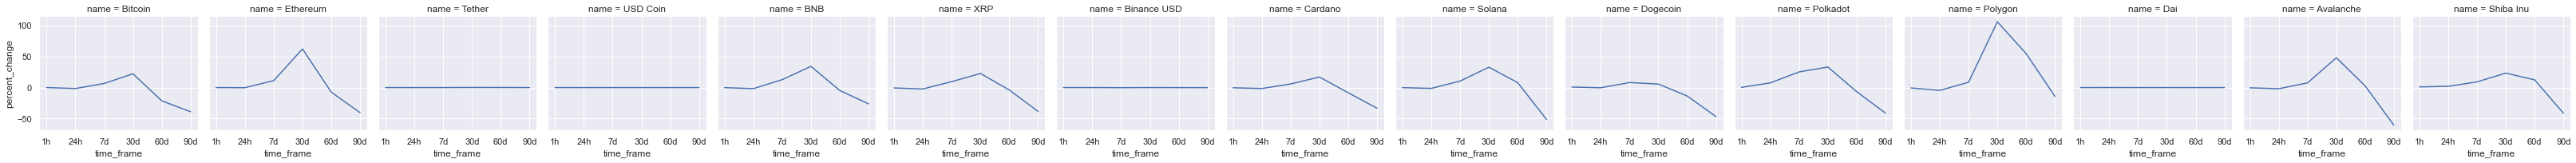

In [84]:
g = sns.FacetGrid(df3, col='name')
g.map(sns.lineplot, "time_frame", "percent_change")